# Test 3: "Real-world" waveform with noise

Just like with the sinusoid test, we can use audio recordings of real-world sounds as a basis for testing the system performance on more complex waveforms, and add progressive levels of white noise for each iteration. 

In the "Data" folder you can find a number of audio files you can use as test input. Most of these files contain a short recording of a continuous musical note. If you wish to adjust the samping frequency of the sound files, take a look at the function [`resample`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html) in the `scipy.signal` module.


[]

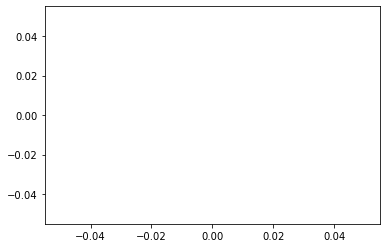

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile  # Import module for handling of .wav audio files
import scipy.signal as ss
from IPython.display import Audio  # Import the Audio object for use in audio playback

import sample_audio
from baseline_algorithm import freq_detection

files = {
    1: "A4_oboe.wav",
    2: "B_oboe.wav",
    3: "C#_oboe.wav",
    4: "D_oboe.wav",
    5: "Zauberflöte_vocal.wav"
}

filesFreq = {
    1: 440,
    2: 30,
    3: 34,
    4: "D_oboe.wav",
    5: "Zauberflöte_vocal.wav"
}

filenr = 1

fs1, sampleData = wavfile.read(r"sample_audio\{}".format(files[filenr]))
signal = sampleData/max(abs(sampleData)) # normaliser
signal = signal[10000:-10000]
fs = 10000
ss.resample(signal,fs)

plt.plot()

95712


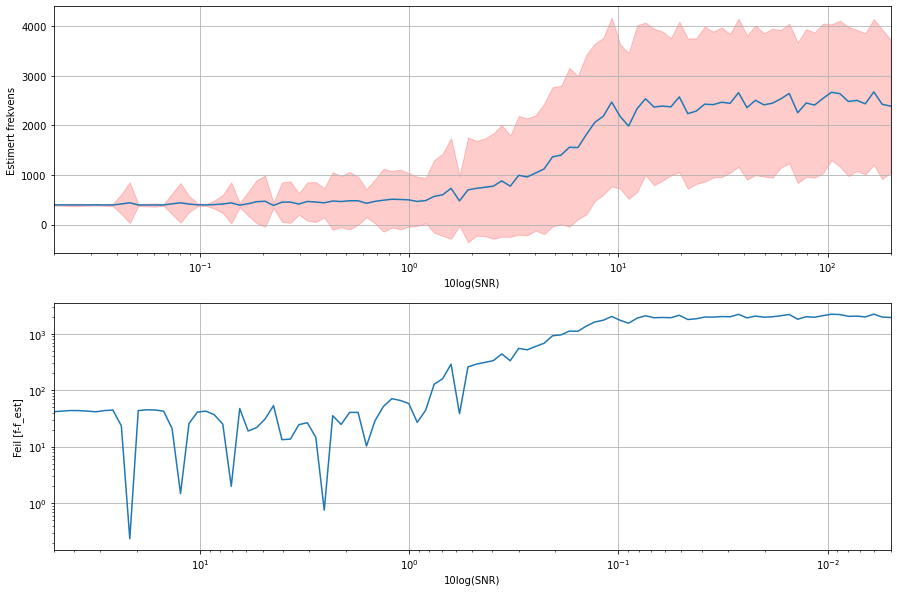

In [17]:
SNR = []
estimatedFreqs = []
errors = []
stdDev = []
N = len(signal)
print(N)
freqList = []

snrList = np.logspace(-2,2,100)

for noise_variance in snrList:
    noise = np.random.normal(scale=np.sqrt(noise_variance), size=N)
    xn = signal+noise
    timestamps, freqs = freq_detection(xn, fs)
    
    SNR.append((1/2) / noise_variance) # gjennomsnitt amplitude er 1/2 pga normalisering
    freqList.append(freqs)
    estimatedFreqs.append(np.mean(freqs))
    stdDev.append(np.std(freqs))
    errors.append(np.abs(filesFreq[filenr]-np.mean(freqs)))
    
SNR = np.array(SNR)
estimatedFreqs = np.array(estimatedFreqs)
errors = np.array(errors)
stdDev = np.array(stdDev)

fig, ax = plt.subplots(2,1, figsize=(15, 10))

ax[0].plot(1/SNR,estimatedFreqs)
ax[0].fill_between(1/SNR, estimatedFreqs - stdDev, estimatedFreqs + stdDev, color='r', alpha=0.2)
ax[0].set_xlabel('10log(SNR)')
ax[0].set_ylabel('Estimert frekvens')
ax[0].set_xlim(min(1/SNR), max(1/SNR))
ax[0].set_xscale('log') 
ax[0].grid(True)

ax[1].plot(SNR,errors)
ax[1].set_xlabel('10log(SNR)')
ax[1].set_ylabel('Feil [f-f_est]')
ax[1].set_xlim(max(SNR), min(SNR))
ax[1].set_xscale('log') 
ax[1].set_yscale('log') 
ax[1].grid(True)

[Here](Figures/wavfileTest_LF.png) is an image showing a *suggestion* for what or test output may look like when using the audio in `A4_oboe.wav` as a signal. As we can see, the frequency detection system produces a stable but erroneous output when there is little noise, suggesting it has "locked on" to a harmonic rather than the fundamental frequency. It is also interesting to note that the noise will begin to cause the estimated frequency to fluctuate a lot earlier than in the case with the pure sinusoid, so while the average error remains more or less unchanged, the estimated frequency will vary significantly.